In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
import random


In [2]:
#introducción de los datos
#N es la cantidad de datos, NN el número de iteraciones para el programa caminante
#definición de av y bv para guardar los parámetros que cumplen la regla de selección
#av[0] y bv[0] son los parametros iniciales dados por uno, cv, y la creación de otras listas es para 
#parametros de otros modelos
#x1 y y1 son los datos 
N=50
NN=10000
dt=np.load('fit_exercise.npy')
x1 = dt[0]
y1 = dt[1]
av=np.zeros(NN)
bv=np.zeros(NN)
cv=np.zeros(NN)

Usare un prior plano i.e cuando tenemos un prior plano:
$$e^{-\frac{(\mu-\mu_{0})^{2}}{2\sigma_{0}^{2}}}\rightarrow 1$$
cuando $\mu_{0}=0$ y $\sigma_{0}\rightarrow \infty$ así en el posterior solo queda el likelihood por maximizar
$$e^{-\frac{(y_{i}-\mu)^{2}}{2\sigma^{2}}}$$, recordando $\mu$ es el modelo

In [3]:
#likelihood gaussiano con modelo de la recta
def likegauss(x, y, var, a, b, n):
        
        return  (np.sqrt(2*math.pi*var)**(-n))*np.exp(-0.5*(var**(-1))*np.sum((y-a-b*x)**2))

In [4]:
def modelo(a, b, x):
    mod=a+b*x
    #mod=a*(x**2)+b*x + c
    #mod=a*np.cos(b*x)+c
    return mod

In [5]:
#likelihood gaussiano con modelo
#si hay que usar más parámetros se agrega la entrada de parametros en 
#modelo, ls y MCM2
def ls(x, y, var, a, b, n, modelo):
        mu=modelo(a, b, x)
        #mu=modelo(a, b, c, x)
        #(np.sqrt(2*math.pi*var)**(-n))*
        return  np.exp(-0.5*(var**(-1))*np.sum((y-mu)**2))

In [6]:
def MCM2(n, likelihood, p1, p2, x1, y1, NN):
#v, varianza de nuestros datos
#vector a guardar parametros, av, bv, cv, dependiendo del modelo
#hay que modificar los parametros que pide modelo, likelihood y MCM2
#likelihood, puede ser distinto al gaussiano
#x1, y1 los datos
#n cantidad de datos
#NN iteraciones
    v=np.var(y1)
    av[0]=p1
    bv[0]=p2
    #cv[0]=p3
    for k in range(NN-1):
        ak=np.random.normal(av[k], 0.2)
        bk= np.random.normal(bv[k], 0.2)
        #ck= np.random.normal(cv[k], 0.2)
        posteriorold=likelihood(x1, y1, v, av[k], bv[k], n, modelo)
        posteriornew=likelihood(x1, y1, v, ak, bk, n, modelo)
        if posteriornew>posteriorold:
            av[k+1]=ak
            bv[k+1]=bk
            #cv[k+1]=ck
        elif posteriornew<=posteriorold:
            ran = random.uniform(0, 1)
            ratio=posteriornew/posteriorold
            if ratio > ran:
                av[k+1]=ak
                bv[k+1]=bk
                #cv[k+1]=ck
            elif ratio <= ran:
                av[k+1]=np.copy(av[k])
                bv[k+1]=np.copy(bv[k])
                #cv[k+1]=np.copy(cv[k])
    return plt.plot(av, bv, 'o'), print('el parámetro a es', av.mean()), print('el parámetro a es', bv.mean())

<ipython-input-6-58cc19076246>:25: RuntimeWarning: invalid value encountered in double_scalars
  ratio=posteriornew/posteriorold


el parámetro a es 4.456328311421814
el parámetro a es -0.9591384735080168


([<matplotlib.lines.Line2D at 0x2aa06c1b8e0>], None, None)

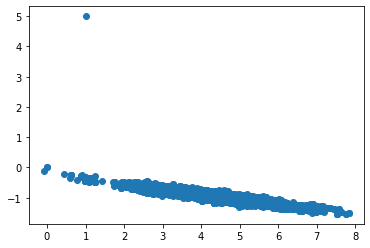

In [7]:
MCM2(N, ls, 1, 5, x1, y1, NN)

In [8]:

def MCM(n, likelihood, p1, p2, x1, y1, NN):
#v, varianza de nuestros datos
#vector a guardar parametros, av y bv
#likelihood, puede ser distinto al gaussiano
#x1, y1 los datos
#n cantidad de datos
#NN iteraciones
    v=np.var(y1)
    av[0]=p1
    bv[0]=p2
    for k in range(NN-1):
        ak=np.random.normal(av[k], 0.2)
        bk= np.random.normal(bv[k], 0.2)
        posteriorold=likelihood(x1, y1, v, av[k], bv[k], n)
        posteriornew=likelihood(x1, y1, v, ak, bk, n)
        if posteriornew>posteriorold:
            av[k+1]=ak
            bv[k+1]=bk
        elif posteriornew<=posteriorold:
            ran = random.uniform(0, 1)
            ratio=posteriornew/posteriorold
            if ratio > ran:
                av[k+1]=ak
                bv[k+1]=bk
            elif ratio <= ran:
                av[k+1]=np.copy(av[k])
                bv[k+1]=np.copy(bv[k])
    return av, bv